In [47]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential, datasets, regularizers
from keras.layers import Dense, Flatten, Dropout

In [2]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

In [3]:
# Load the Fashion MNIST dataset
fashion_mnist = datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

In [4]:
X_train_full.shape, y_train_full.shape

((60000, 28, 28), (60000,))

In [5]:
X_train, X_valid = X_train_full[:50000], X_train_full[50000:]
y_train, y_valid = y_train_full[:50000], y_train_full[50000:]

In [6]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,
          0,   0,  13,  73,   0,   0,   1,   4,   0,   0,   0,   0,   1,
          1,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
          0,  36, 136, 127,  62,  54,   0,   0,   0,   1,   3,   4,   0,
          0,   3],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   6,
          0, 102, 204, 176, 134, 144, 123,  23,   0,   0,   0,   0,  12,
         10,   0],
       [  

In [7]:
X_train = X_train/255
X_valid = X_valid/255
X_test = X_test/255

In [8]:
X_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [9]:
model = Sequential()
model.add(Flatten(input_shape=(28,28)))
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(10, activation='softmax'))

/opt/anaconda3/envs/dev/lib/python3.12/site-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [10]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │           330 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 111,146 (434.16 KB)

 Trainable params: 111,146 (434.16 KB)

 Non-trainable params: 0 (0.00 B)

In [11]:
model.compile(optimizer='adam', loss= 'sparse_categorical_crossentropy', metrics=['accuracy'])

In [12]:
history = model.fit(x=X_train, y=y_train, batch_size=128, epochs=50, validation_data=(X_valid, y_valid))

Epoch 1/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 1s 935us/step - accuracy: 0.6920 - loss: 0.9107 - val_accuracy: 0.8443 - val_loss: 0.4490
Epoch 2/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 0s 841us/step - accuracy: 0.8534 - loss: 0.4156 - val_accuracy: 0.8625 - val_loss: 0.3914
Epoch 3/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 0s 816us/step - accuracy: 0.8667 - loss: 0.3674 - val_accuracy: 0.8675 - val_loss: 0.3685
Epoch 4/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 0s 869us/step - accuracy: 0.8779 - loss: 0.3313 - val_accuracy: 0.8728 - val_loss: 0.3489
Epoch 5/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 0s 853us/step - accuracy: 0.8867 - loss: 0.3126 - val_accuracy: 0.8792 - val_loss: 0.3288
Epoch 6/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 0s 812us/step - accuracy: 0.8892 - loss: 0.3003 - val_accuracy: 0.8753 - val_loss: 0.3502
Epoch 7/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 0s 825us/step - accuracy: 0.8947 - loss: 0.2834 - val_accuracy: 0.8805 - val_loss: 0.3296
Epoch 8/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 0s 974us/step - accuracy: 0.8990 - loss: 0.2711 - 

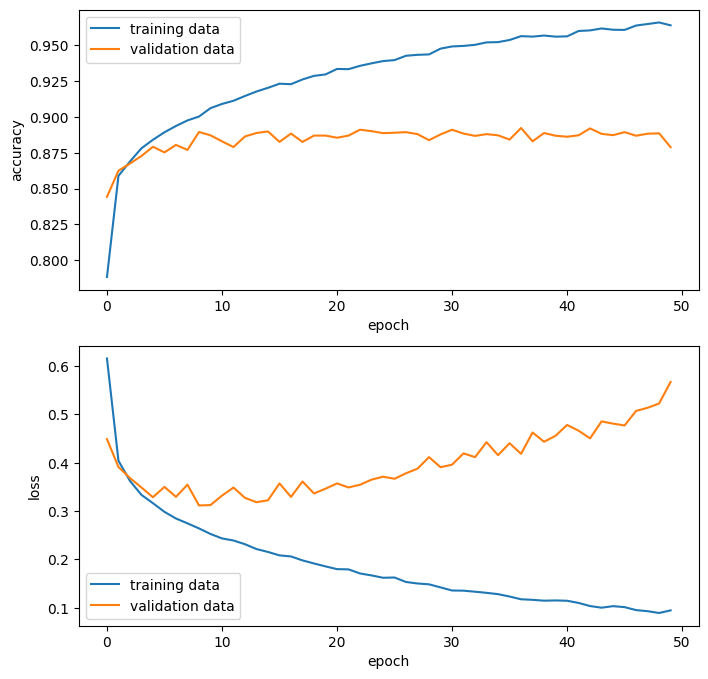

In [14]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure(figsize=(8, 8))

plt.subplot(2, 1, 1)
plt.plot(acc, label='training data')
plt.plot(val_acc, label='validation data')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend()

plt.subplot(2, 1, 2)
plt.plot(loss, label='training data')
plt.plot(val_loss, label='validation data')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend();

## the above is a clear case of overfitting. We will try to reduce the overfitting using the below regularization methods

#### l2 regularization

In [15]:
model1 = Sequential()
model1.add(Flatten(input_shape=(28,28)))
model1.add(Dense(128, activation='relu', kernel_regularizer= regularizers.l2()))
model1.add(Dense(64, activation='relu', kernel_regularizer= regularizers.l2()))
model1.add(Dense(32, activation='relu', kernel_regularizer= regularizers.l2()))
model1.add(Dense(10, activation='softmax'))

In [16]:
model1.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_1 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 10)             │           330 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 111,146 (434.16 KB)

 Trainable params: 111,146 (434.16 KB)

 Non-trainable params: 0 (0.00 B)

In [17]:
model1.compile(optimizer='adam', loss= 'sparse_categorical_crossentropy', metrics=['accuracy'])

In [18]:
history1 = model1.fit(x=X_train, y=y_train, batch_size=128, epochs=50, validation_data=(X_valid, y_valid))

Epoch 1/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 1s 968us/step - accuracy: 0.7007 - loss: 2.5408 - val_accuracy: 0.8071 - val_loss: 1.0268
Epoch 2/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 0s 844us/step - accuracy: 0.8139 - loss: 0.9730 - val_accuracy: 0.8199 - val_loss: 0.8768
Epoch 3/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 0s 838us/step - accuracy: 0.8142 - loss: 0.8616 - val_accuracy: 0.8185 - val_loss: 0.8180
Epoch 4/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 0s 836us/step - accuracy: 0.8173 - loss: 0.8111 - val_accuracy: 0.8136 - val_loss: 0.7869
Epoch 5/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 0s 845us/step - accuracy: 0.8220 - loss: 0.7697 - val_accuracy: 0.8193 - val_loss: 0.7587
Epoch 6/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 0s 861us/step - accuracy: 0.8267 - loss: 0.7401 - val_accuracy: 0.8214 - val_loss: 0.7310
Epoch 7/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 0s 840us/step - accuracy: 0.8278 - loss: 0.7245 - val_accuracy: 0.8223 - val_loss: 0.7313
Epoch 8/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 0s 838us/step - accuracy: 0.8299 - loss: 0.7078 - 

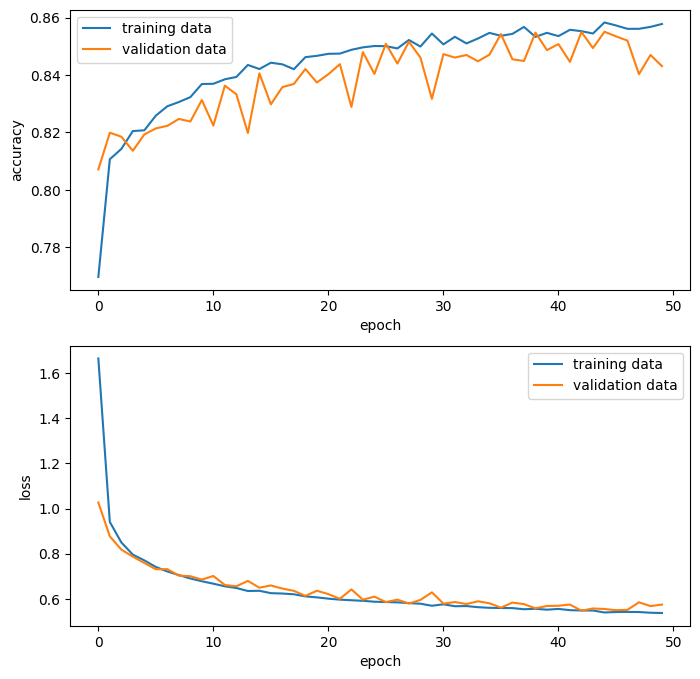

In [19]:
acc = history1.history['accuracy']
val_acc = history1.history['val_accuracy']

loss = history1.history['loss']
val_loss = history1.history['val_loss']

plt.figure(figsize=(8, 8))

plt.subplot(2, 1, 1)
plt.plot(acc, label='training data')
plt.plot(val_acc, label='validation data')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend()

plt.subplot(2, 1, 2)
plt.plot(loss, label='training data')
plt.plot(val_loss, label='validation data')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend();

In [20]:
#### We can see we have reduced the overfitting considerably

In [21]:
model2 = Sequential()
model2.add(Flatten(input_shape=(28,28)))
model2.add(Dense(128, activation='relu', kernel_regularizer= regularizers.l2(0.05)))
model2.add(Dense(64, activation='relu', kernel_regularizer= regularizers.l2(0.05)))
model2.add(Dense(32, activation='relu', kernel_regularizer= regularizers.l2(0.05)))
model2.add(Dense(10, activation='softmax'))

In [22]:
model2.compile(optimizer='adam', loss= 'sparse_categorical_crossentropy', metrics=['accuracy'])

In [23]:
history2 = model2.fit(x=X_train, y=y_train, batch_size=128, epochs=50, validation_data=(X_valid, y_valid))

Epoch 1/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.5800 - loss: 6.6199 - val_accuracy: 0.7138 - val_loss: 1.4585
Epoch 2/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7249 - loss: 1.3774 - val_accuracy: 0.7509 - val_loss: 1.2301
Epoch 3/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7420 - loss: 1.2106 - val_accuracy: 0.7479 - val_loss: 1.1308
Epoch 4/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7505 - loss: 1.1226 - val_accuracy: 0.7363 - val_loss: 1.1063
Epoch 5/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7538 - loss: 1.0758 - val_accuracy: 0.7640 - val_loss: 1.0575
Epoch 6/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7573 - loss: 1.0456 - val_accuracy: 0.7506 - val_loss: 1.0175
Epoch 7/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7577 - loss: 1.0236 - val_accuracy: 0.7577 - val_loss: 1.0011
Epoch 8/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7666 - loss: 0.9930 - val_accuracy: 0.

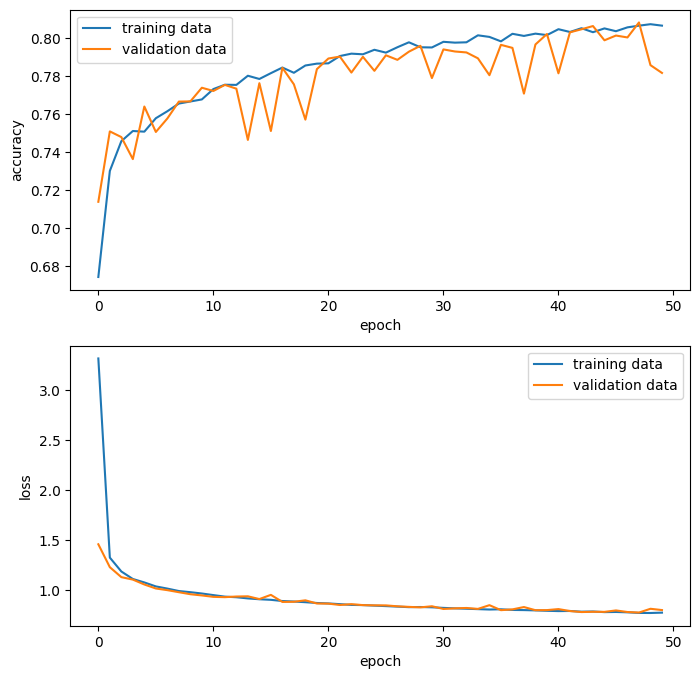

In [24]:
acc = history2.history['accuracy']
val_acc = history2.history['val_accuracy']

loss = history2.history['loss']
val_loss = history2.history['val_loss']

plt.figure(figsize=(8, 8))

plt.subplot(2, 1, 1)
plt.plot(acc, label='training data')
plt.plot(val_acc, label='validation data')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend()

plt.subplot(2, 1, 2)
plt.plot(loss, label='training data')
plt.plot(val_loss, label='validation data')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend();

In [25]:
model3 = Sequential()
model3.add(Flatten(input_shape=(28,28)))
model3.add(Dense(128, activation='relu', kernel_regularizer= regularizers.l2(0.1)))
model3.add(Dense(64, activation='relu', kernel_regularizer= regularizers.l2(0.1)))
model3.add(Dense(32, activation='relu', kernel_regularizer= regularizers.l2(0.1)))
model3.add(Dense(10, activation='softmax'))

In [26]:
model3.compile(optimizer='adam', loss= 'sparse_categorical_crossentropy', metrics=['accuracy'])

In [27]:
history3 = model3.fit(x=X_train, y=y_train, batch_size=128, epochs=50, validation_data=(X_valid, y_valid))

Epoch 1/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.4915 - loss: 11.4079 - val_accuracy: 0.6035 - val_loss: 1.6743
Epoch 2/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 0s 959us/step - accuracy: 0.6239 - loss: 1.6215 - val_accuracy: 0.6727 - val_loss: 1.4727
Epoch 3/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 0s 969us/step - accuracy: 0.6594 - loss: 1.4536 - val_accuracy: 0.6765 - val_loss: 1.3721
Epoch 4/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6727 - loss: 1.3727 - val_accuracy: 0.6815 - val_loss: 1.3191
Epoch 5/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 0s 952us/step - accuracy: 0.6758 - loss: 1.3245 - val_accuracy: 0.6953 - val_loss: 1.2764
Epoch 6/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 0s 949us/step - accuracy: 0.6927 - loss: 1.2746 - val_accuracy: 0.6828 - val_loss: 1.2800
Epoch 7/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 0s 961us/step - accuracy: 0.6920 - loss: 1.2498 - val_accuracy: 0.7055 - val_loss: 1.2206
Epoch 8/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 0s 964us/step - accuracy: 0.7074 - loss: 1.2127 - val

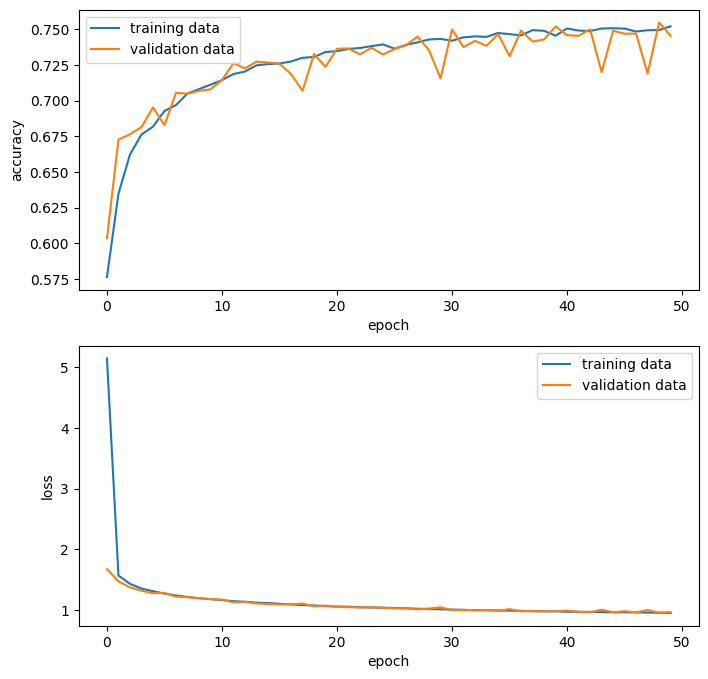

In [28]:
acc = history3.history['accuracy']
val_acc = history3.history['val_accuracy']

loss = history3.history['loss']
val_loss = history3.history['val_loss']

plt.figure(figsize=(8, 8))

plt.subplot(2, 1, 1)
plt.plot(acc, label='training data')
plt.plot(val_acc, label='validation data')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend()

plt.subplot(2, 1, 2)
plt.plot(loss, label='training data')
plt.plot(val_loss, label='validation data')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend();

In [29]:
model4 = Sequential()
model4.add(Flatten(input_shape=(28,28)))
model4.add(Dense(128, activation='relu', kernel_regularizer= regularizers.l2(0.005)))
model4.add(Dense(64, activation='relu', kernel_regularizer= regularizers.l2(0.005)))
model4.add(Dense(32, activation='relu', kernel_regularizer= regularizers.l2(0.005)))
model4.add(Dense(10, activation='softmax'))

In [30]:
model4.compile(optimizer='adam', loss= 'sparse_categorical_crossentropy', metrics=['accuracy'])

In [31]:
history4 = model4.fit(x=X_train, y=y_train, batch_size=128, epochs=50, validation_data=(X_valid, y_valid))

Epoch 1/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.6702 - loss: 1.9244 - val_accuracy: 0.8223 - val_loss: 0.8771
Epoch 2/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 0s 948us/step - accuracy: 0.8257 - loss: 0.8337 - val_accuracy: 0.8324 - val_loss: 0.7558
Epoch 3/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 0s 953us/step - accuracy: 0.8311 - loss: 0.7337 - val_accuracy: 0.8396 - val_loss: 0.6974
Epoch 4/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 0s 971us/step - accuracy: 0.8330 - loss: 0.6936 - val_accuracy: 0.8290 - val_loss: 0.6901
Epoch 5/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 0s 956us/step - accuracy: 0.8417 - loss: 0.6577 - val_accuracy: 0.8405 - val_loss: 0.6459
Epoch 6/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 0s 958us/step - accuracy: 0.8434 - loss: 0.6363 - val_accuracy: 0.8235 - val_loss: 0.6640
Epoch 7/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 0s 945us/step - accuracy: 0.8466 - loss: 0.6137 - val_accuracy: 0.8364 - val_loss: 0.6386
Epoch 8/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 0s 930us/step - accuracy: 0.8486 - loss: 0.6011 - va

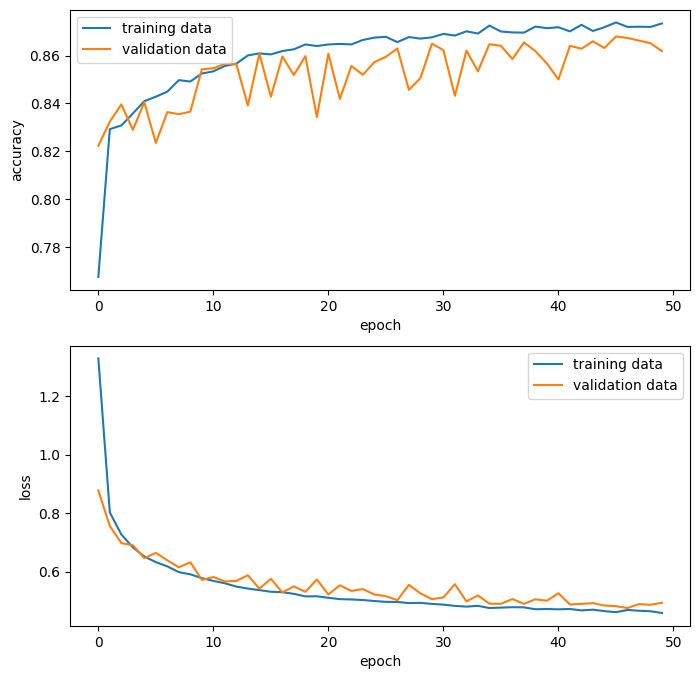

In [32]:
acc = history4.history['accuracy']
val_acc = history4.history['val_accuracy']

loss = history4.history['loss']
val_loss = history4.history['val_loss']

plt.figure(figsize=(8, 8))

plt.subplot(2, 1, 1)
plt.plot(acc, label='training data')
plt.plot(val_acc, label='validation data')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend()

plt.subplot(2, 1, 2)
plt.plot(loss, label='training data')
plt.plot(val_loss, label='validation data')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend();

#### model4 is performing better than the rest when l2 regularization technique. Let's explore techniques as well

### l1 regularizer

In [34]:
model5 = Sequential()
model5.add(Flatten(input_shape=(28,28)))
model5.add(Dense(128, activation='relu', kernel_regularizer= regularizers.l1()))
model5.add(Dense(64, activation='relu', kernel_regularizer= regularizers.l1()))
model5.add(Dense(32, activation='relu', kernel_regularizer= regularizers.l1()))
model5.add(Dense(10, activation='softmax'))

In [35]:
model5.compile(optimizer='adam', loss= 'sparse_categorical_crossentropy', metrics=['accuracy'])

In [36]:
history5 = model5.fit(x=X_train, y=y_train, batch_size=128, epochs=50, validation_data=(X_valid, y_valid))

Epoch 1/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.3742 - loss: 16.4638 - val_accuracy: 0.5681 - val_loss: 1.8166
Epoch 2/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 0s 907us/step - accuracy: 0.5869 - loss: 1.7548 - val_accuracy: 0.6039 - val_loss: 1.6213
Epoch 3/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 0s 930us/step - accuracy: 0.6039 - loss: 1.6011 - val_accuracy: 0.6122 - val_loss: 1.5405
Epoch 4/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 0s 936us/step - accuracy: 0.6210 - loss: 1.5132 - val_accuracy: 0.6099 - val_loss: 1.4807
Epoch 5/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 0s 943us/step - accuracy: 0.6329 - loss: 1.4624 - val_accuracy: 0.6347 - val_loss: 1.4339
Epoch 6/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 0s 936us/step - accuracy: 0.6459 - loss: 1.4160 - val_accuracy: 0.6429 - val_loss: 1.4047
Epoch 7/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 0s 973us/step - accuracy: 0.6591 - loss: 1.3809 - val_accuracy: 0.6477 - val_loss: 1.3695
Epoch 8/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 0s 929us/step - accuracy: 0.6658 - loss: 1.3602 - v

In [37]:
model6 = Sequential()
model6.add(Flatten(input_shape=(28,28)))
model6.add(Dense(128, activation='relu', kernel_regularizer= regularizers.l1(0.005)))
model6.add(Dense(64, activation='relu', kernel_regularizer= regularizers.l1(0.005)))
model6.add(Dense(32, activation='relu', kernel_regularizer= regularizers.l1(0.005)))
model6.add(Dense(10, activation='softmax'))

In [39]:
model6.compile(optimizer='adam', loss= 'sparse_categorical_crossentropy', metrics=['accuracy'])

In [40]:
history6 = model6.fit(x=X_train, y=y_train, batch_size=128, epochs=50, validation_data=(X_valid, y_valid))

Epoch 1/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.6232 - loss: 9.5191 - val_accuracy: 0.7515 - val_loss: 1.7101
Epoch 2/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 0s 940us/step - accuracy: 0.7510 - loss: 1.6190 - val_accuracy: 0.7675 - val_loss: 1.4141
Epoch 3/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 0s 926us/step - accuracy: 0.7699 - loss: 1.3777 - val_accuracy: 0.7712 - val_loss: 1.2852
Epoch 4/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 0s 941us/step - accuracy: 0.7781 - loss: 1.2539 - val_accuracy: 0.7826 - val_loss: 1.1885
Epoch 5/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 0s 943us/step - accuracy: 0.7781 - loss: 1.1812 - val_accuracy: 0.7746 - val_loss: 1.1536
Epoch 6/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 0s 951us/step - accuracy: 0.7837 - loss: 1.1215 - val_accuracy: 0.7808 - val_loss: 1.0927
Epoch 7/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 0s 979us/step - accuracy: 0.7852 - loss: 1.0815 - val_accuracy: 0.7849 - val_loss: 1.0881
Epoch 8/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 0s 936us/step - accuracy: 0.7925 - loss: 1.0555 - va

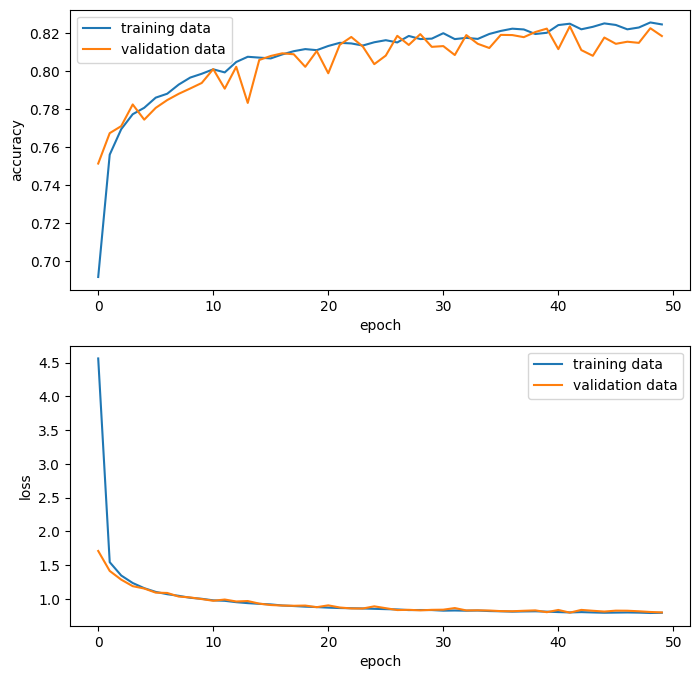

In [41]:
acc = history6.history['accuracy']
val_acc = history6.history['val_accuracy']

loss = history6.history['loss']
val_loss = history6.history['val_loss']

plt.figure(figsize=(8, 8))

plt.subplot(2, 1, 1)
plt.plot(acc, label='training data')
plt.plot(val_acc, label='validation data')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend()

plt.subplot(2, 1, 2)
plt.plot(loss, label='training data')
plt.plot(val_loss, label='validation data')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend();

In [44]:
model7 = Sequential()
model7.add(Flatten(input_shape=(28,28)))
model7.add(Dense(128, activation='relu', kernel_regularizer= regularizers.l1(0.1)))
model7.add(Dense(64, activation='relu', kernel_regularizer= regularizers.l1(0.1)))
model7.add(Dense(32, activation='relu', kernel_regularizer= regularizers.l1(0.1)))
model7.add(Dense(10, activation='softmax'))

In [45]:
model7.compile(optimizer='adam', loss= 'sparse_categorical_crossentropy', metrics=['accuracy'])

In [46]:
history7 = model7.fit(x=X_train, y=y_train, batch_size=128, epochs=50, validation_data=(X_valid, y_valid))

Epoch 1/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.1269 - loss: 143.7449 - val_accuracy: 0.0968 - val_loss: 3.6304
Epoch 2/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 0s 932us/step - accuracy: 0.0995 - loss: 3.6303 - val_accuracy: 0.0968 - val_loss: 3.6299
Epoch 3/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 0s 899us/step - accuracy: 0.1000 - loss: 3.6300 - val_accuracy: 0.0988 - val_loss: 3.6312
Epoch 4/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.1006 - loss: 3.6301 - val_accuracy: 0.0968 - val_loss: 3.6302
Epoch 5/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 0s 902us/step - accuracy: 0.0996 - loss: 3.6298 - val_accuracy: 0.0988 - val_loss: 3.6265
Epoch 6/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 0s 905us/step - accuracy: 0.1010 - loss: 3.6298 - val_accuracy: 0.0968 - val_loss: 3.6271
Epoch 7/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 0s 920us/step - accuracy: 0.1011 - loss: 3.6300 - val_accuracy: 0.0996 - val_loss: 3.6311
Epoch 8/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 0s 920us/step - accuracy: 0.0958 - loss: 3.6298 - va

### drop out regularization

In [48]:
model8 = Sequential()
model8.add(Flatten(input_shape=(28,28)))
model8.add(Dense(128, activation='relu'))
model8.add(Dropout(rate=0.3))
model8.add(Dense(64, activation='relu'))
model8.add(Dropout(rate=0.1))
model8.add(Dense(32, activation='relu'))
model8.add(Dense(10, activation='softmax'))

/opt/anaconda3/envs/dev/lib/python3.12/site-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [49]:
model8.compile(optimizer='adam', loss= 'sparse_categorical_crossentropy', metrics=['accuracy'])

In [50]:
history8 = model8.fit(x=X_train, y=y_train, batch_size=128, epochs=50, validation_data=(X_valid, y_valid))

Epoch 1/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.6330 - loss: 1.0135 - val_accuracy: 0.8274 - val_loss: 0.4705
Epoch 2/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 0s 936us/step - accuracy: 0.8282 - loss: 0.4840 - val_accuracy: 0.8560 - val_loss: 0.4056
Epoch 3/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 0s 951us/step - accuracy: 0.8463 - loss: 0.4206 - val_accuracy: 0.8566 - val_loss: 0.3903
Epoch 4/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 0s 928us/step - accuracy: 0.8537 - loss: 0.4013 - val_accuracy: 0.8578 - val_loss: 0.3859
Epoch 5/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 0s 948us/step - accuracy: 0.8610 - loss: 0.3832 - val_accuracy: 0.8655 - val_loss: 0.3615
Epoch 6/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8673 - loss: 0.3638 - val_accuracy: 0.8678 - val_loss: 0.3618
Epoch 7/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 0s 956us/step - accuracy: 0.8699 - loss: 0.3540 - val_accuracy: 0.8740 - val_loss: 0.3385
Epoch 8/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 0s 930us/step - accuracy: 0.8730 - loss: 0.3437 - val_

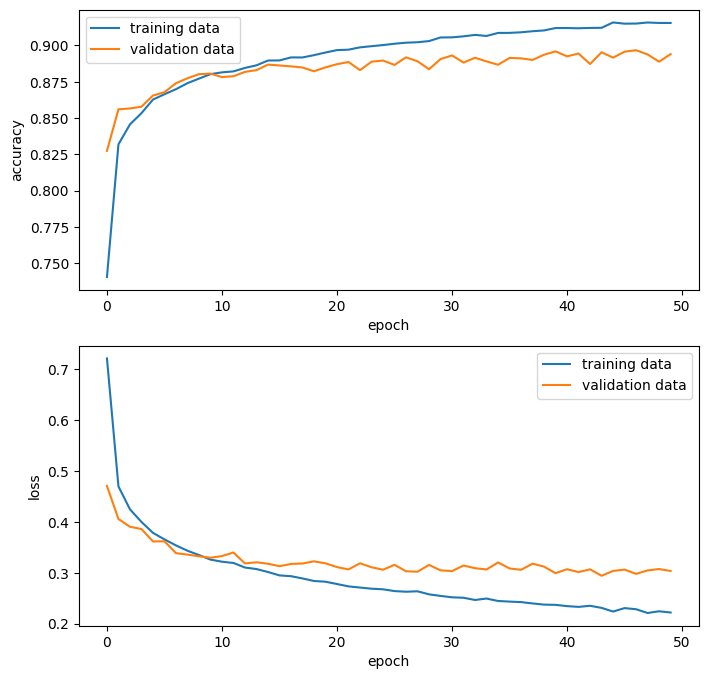

In [51]:
acc = history8.history['accuracy']
val_acc = history8.history['val_accuracy']

loss = history8.history['loss']
val_loss = history8.history['val_loss']

plt.figure(figsize=(8, 8))

plt.subplot(2, 1, 1)
plt.plot(acc, label='training data')
plt.plot(val_acc, label='validation data')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend()

plt.subplot(2, 1, 2)
plt.plot(loss, label='training data')
plt.plot(val_loss, label='validation data')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend();

In [52]:
model9 = Sequential()
model9.add(Flatten(input_shape=(28,28)))
model9.add(Dense(128, activation='relu'))
model9.add(Dropout(rate=0.3))
model9.add(Dense(64, activation='relu'))
model9.add(Dropout(rate=0.3))
model9.add(Dense(32, activation='relu'))
model9.add(Dense(10, activation='softmax'))

In [53]:
model9.compile(optimizer='adam', loss= 'sparse_categorical_crossentropy', metrics=['accuracy'])

In [54]:
history9 = model9.fit(x=X_train, y=y_train, batch_size=128, epochs=50, validation_data=(X_valid, y_valid))

Epoch 1/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.5958 - loss: 1.1279 - val_accuracy: 0.8294 - val_loss: 0.4707
Epoch 2/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 0s 954us/step - accuracy: 0.8097 - loss: 0.5297 - val_accuracy: 0.8472 - val_loss: 0.4110
Epoch 3/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 0s 986us/step - accuracy: 0.8350 - loss: 0.4580 - val_accuracy: 0.8588 - val_loss: 0.3917
Epoch 4/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 0s 971us/step - accuracy: 0.8462 - loss: 0.4285 - val_accuracy: 0.8535 - val_loss: 0.3892
Epoch 5/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 0s 962us/step - accuracy: 0.8550 - loss: 0.3985 - val_accuracy: 0.8673 - val_loss: 0.3769
Epoch 6/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 0s 935us/step - accuracy: 0.8629 - loss: 0.3797 - val_accuracy: 0.8719 - val_loss: 0.3544
Epoch 7/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 0s 969us/step - accuracy: 0.8618 - loss: 0.3715 - val_accuracy: 0.8765 - val_loss: 0.3427
Epoch 8/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 0s 973us/step - accuracy: 0.8667 - loss: 0.3648 - va

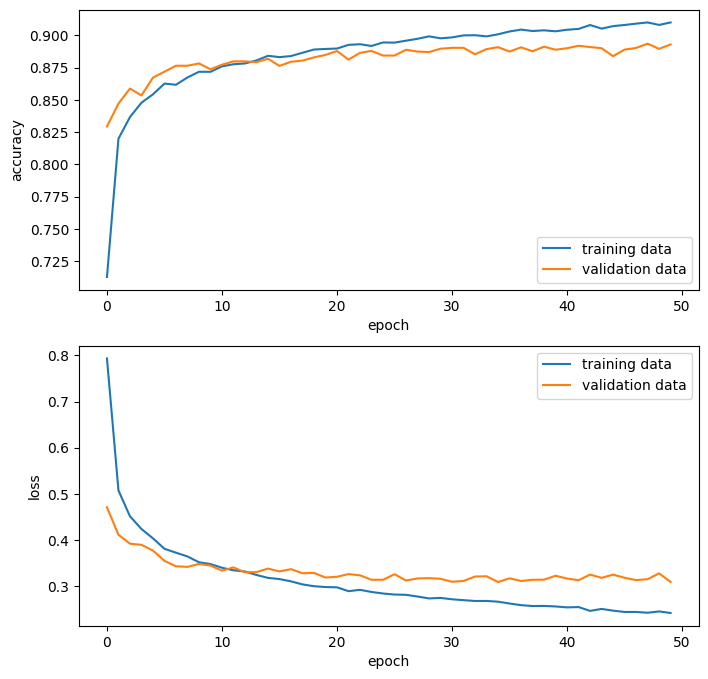

In [55]:
acc = history9.history['accuracy']
val_acc = history9.history['val_accuracy']

loss = history9.history['loss']
val_loss = history9.history['val_loss']

plt.figure(figsize=(8, 8))

plt.subplot(2, 1, 1)
plt.plot(acc, label='training data')
plt.plot(val_acc, label='validation data')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend()

plt.subplot(2, 1, 2)
plt.plot(loss, label='training data')
plt.plot(val_loss, label='validation data')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend();

In [56]:
model10 = Sequential()
model10.add(Flatten(input_shape=(28,28)))
model10.add(Dense(128, activation='relu'))
model10.add(Dropout(rate=0.4))
model10.add(Dense(64, activation='relu'))
model10.add(Dropout(rate=0.3))
model10.add(Dense(32, activation='relu'))
model10.add(Dense(10, activation='softmax'))

In [57]:
model10.compile(optimizer='adam', loss= 'sparse_categorical_crossentropy', metrics=['accuracy'])

In [58]:
history10 = model10.fit(x=X_train, y=y_train, batch_size=128, epochs=50, validation_data=(X_valid, y_valid))

Epoch 1/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.5853 - loss: 1.1389 - val_accuracy: 0.8284 - val_loss: 0.4762
Epoch 2/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 0s 1000us/step - accuracy: 0.8065 - loss: 0.5410 - val_accuracy: 0.8403 - val_loss: 0.4299
Epoch 3/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8260 - loss: 0.4871 - val_accuracy: 0.8552 - val_loss: 0.3956
Epoch 4/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8378 - loss: 0.4471 - val_accuracy: 0.8615 - val_loss: 0.3787
Epoch 5/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8478 - loss: 0.4281 - val_accuracy: 0.8638 - val_loss: 0.3801
Epoch 6/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8492 - loss: 0.4116 - val_accuracy: 0.8668 - val_loss: 0.3629
Epoch 7/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8570 - loss: 0.4039 - val_accuracy: 0.8690 - val_loss: 0.3559
Epoch 8/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 0s 999us/step - accuracy: 0.8578 - loss: 0.3945 - val_accurac

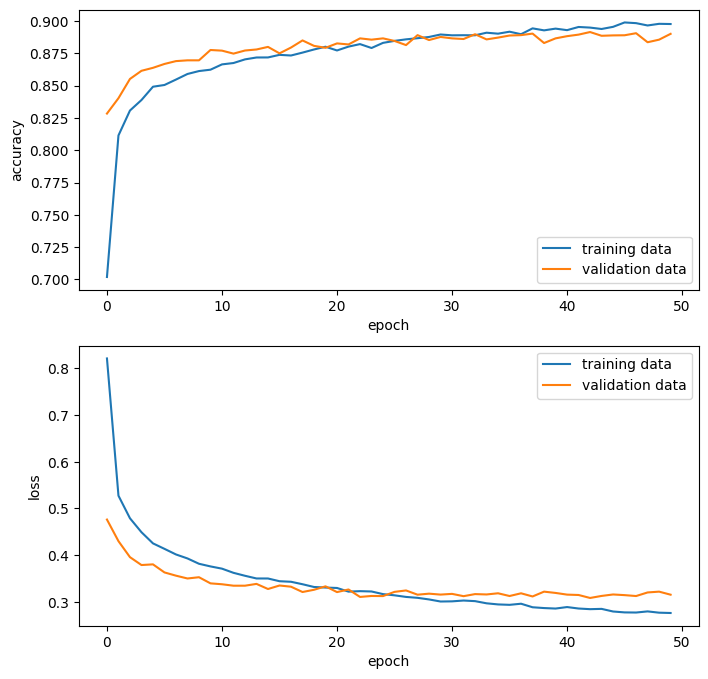

In [59]:
acc = history10.history['accuracy']
val_acc = history10.history['val_accuracy']

loss = history10.history['loss']
val_loss = history10.history['val_loss']

plt.figure(figsize=(8, 8))

plt.subplot(2, 1, 1)
plt.plot(acc, label='training data')
plt.plot(val_acc, label='validation data')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend()

plt.subplot(2, 1, 2)
plt.plot(loss, label='training data')
plt.plot(val_loss, label='validation data')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend();